# PROYECTO FINAL

# 1. Objetivo del análisis:  
## Predecir que un jugador de golf gane en la temporada.

Soy fan del golf y la tecnología y como hace un año estoy en el sector de Data Analitycs quise mezclar mis dos pasiones y por fin pude encontrar data para realizar este trabajo.

Para este proyecto voy a tratar de evaluar algún clasificador para poder predecir si un jugador del PGA Tour ha podido ganar un evento en la temporada en cuestión.

**Preguntas Clave:**

* ¿Que hace que los profesionales sean tan buenos como son?

  * Hipótesis: Invierten mucho tiempo y dinero en la preparación física y mental, ya que esas dos cuestiones son muy importantes.

* ¿Cómo influye la tecnología de los materiales en el golf?
  
  * Hipótesis: La tecnología de los materieles ha avanzado y hoy en día los palos de golf ya no son de madera y hierro sino de titanio y grafito.

## 2. Contexto comercial:

Como sabemos el golf ha ido creciendo en cantidad de aficionados, jugadores y nuevos torneos con mucho dinero a repartir entre los ganadores. Por esto en los últimos años se ha vuelto muy competitivo y apasionante haciendolo atractivo para las casas de apuestas.

Abriéndose esta gran puerta a las apuestas es que motiva a mucha gente poder tener conocimiento estadístico y de esta forma poder saber si puede tener a algún golfista como predilecto para sus apuestas.



## 3. Problema Comercial:

Este es un problema de clasificación supervisada estándar.

**Supervisado**: las etiquetas se incluyen en los datos de entrenamiento. El objetivo es entrenar un modelo para predecir etiquetas en un conjunto de datos de prueba a partir de características.

**Clasificación**: las etiquetas se incluyen en los datos de entrenamiento. El objetivo es entrenar un modelo para predecir etiquetas en un conjunto de datos de prueba a partir de características.

## 4. Contexto Analítico

Definimos cómo los datos disponibles pueden ser utilizados para abordar el problema comercial identificado. Vamos a detallar los aspectos del dataset y cómo estos pueden ser analizados para obtener insights relevantes.


El dataset que vamos a utilizar es el "pgatour_cleaned_1.csv", que contiene datos sobre los torneos de golf del PGA Tour entre el 2007 y 2017.

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
url='https://raw.githubusercontent.com/MaxGero/CoderHouseData/main/pgatour_cleaned_1.csv' # por el link de tu dataset en github en formato raw
df= pd.read_csv(url, sep=';')

### Contexto Analítico: Variables Clave en el Dataset:

* **NAME -** Nombre y apellido del golfista.
* **ROUND -** Cantidad de ronda jugadas en el PGA Tour en ese año por ese jugador en particular.
* **SCORING -** Promedio de golpes por ronda jugada ese año. Esta métrica es un **promedio de golpes** ajustado, que tiene en cuenta la dificultad del campo para cada evento.
* **DRIVE_DISTANCE:** Promedio del recorrido de la bola medido en yardas del golpe inicial. Los drives se miden en dos hoyos por ronda y se seleccionan hoyos que miran en direcciones opuestas para contrarrestar el efecto del viento. Los drives se miden hasta el punto en el que se detiene la pelota independientemente de si están en el fairway o no.
* **FWY_% (Fairway_%):** El porcentaje de veces que un golpe de salida se detiene en el fairway (independientemente del palo).
* **GIR_% (Green In Regulation_%):** El porcentaje de veces que un jugador pudo llegar al "green en regulación". Se considera un "green en regulación" si la bola cae en la superficie del putting green del hoyo después de que se haya ejecutado el golpe. El GIR se determina restando 2 del par en un hoyo (1er golpe en un par 3, 2º en un par 4, 3º en un par 5).
* **SG_P (golpes ganados en el putt):** La cantidad de putts que realiza un jugador desde una distancia específica se mide contra una línea de base estadística para determinar los golpes ganados o perdidos del jugador en un hoyo. La suma de los valores de todos los hoyos jugados en una ronda menos el promedio de golpes ganados/perdidos en el campo para la ronda son los golpes ganados/perdidos del jugador en esa ronda. La suma de los golpes ganados en cada ronda se divide entre el total de rondas jugadas.
* **SG_TTG (Golpes ganados desde el tee hasta el green):** El promedio por ronda del número de golpes que el jugador fue mejor o peor que el promedio del campo en el mismo campo y evento menos los golpes ganados por el jugador en el valor del putt.
* **SG_T (Total de golpes ganados):** El promedio por ronda del número de golpes que el jugador fue mejor o peor que el promedio del campo en el mismo campo y evento.
* **POINTS:** Los puntos acumulativos que el jugador ha obtenido en la carrera de puntos de la Copa FedEx durante el año jugado.
* **TOP_10:** Cantidad de veces que estuvo en el top 10 en torneos durante el año jugado.
* **1ST:** Número de victorias que obtuvo el jugador durante el año jugado.
* **YEAR:** - Año de la temporada del PGA Tour.
* **MONEY:** ganancias del PGA Tour de la temporada especificada.
* **COUNTRY:** país de origen del jugador.

## 5. Exploración de datos (EDA)

### a. Primer Vistazo

In [68]:
# Mostrar las primeras filas del dataset
print(df.head())

   ID            NAME  ROUNDS  SCORING  DRIVE_DISTANCE  FWY_%  GIR_%   SG_P  \
0   0  Aaron Baddeley      83   70.088           291.9  60.00  60.35  0.629   
1   1      Adam Scott      69   70.008           300.9  59.17  65.44  0.129   
2   2      Alex Cejka      80   70.437           288.9  68.08  69.44 -0.479   
3   3   Anders Hansen      55   70.856           280.7  66.95  62.85 -0.176   
4   4   Andrew Buckle      77   71.443           294.7  58.14  62.52  0.161   

   SG_TTG   SG_T  POINTS  TOP 10  1ST  Year    MONEY COUNTRY  
0   0.435  1.064   17703       7    1  2007  3441119     AUS  
1   1.105  1.234   15630       6    1  2007  3413185     AUS  
2   1.207  0.728    2400       4    0  2007   868303     GER  
3   0.087 -0.089    1989       0    0  2007   461216     DEN  
4  -0.426 -0.265    1875       1    0  2007   513630     AUS  


In [69]:
# Dimensiones del dataset
print("Dimensiones del dataset:", df.shape)

Dimensiones del dataset: (2044, 16)


### b. Análisis Descriptivo

In [70]:
# Tipos de datos
print("Tipos de datos en el dataset:")
print(df.dtypes)

Tipos de datos en el dataset:
ID                  int64
NAME               object
ROUNDS              int64
SCORING           float64
DRIVE_DISTANCE    float64
FWY_%             float64
GIR_%             float64
SG_P              float64
SG_TTG            float64
SG_T              float64
POINTS              int64
TOP 10              int64
1ST                 int64
Year                int64
MONEY               int64
COUNTRY            object
dtype: object


In [71]:
# Estadísticas descriptivas para variables numéricas
print("Estadísticas descriptivas para variables numéricas:")
print(df.describe())

Estadísticas descriptivas para variables numéricas:
                ID       ROUNDS      SCORING  DRIVE_DISTANCE        FWY_%  \
count  2044.000000  2044.000000  2044.000000     2044.000000  2044.000000   
mean   1021.500000    79.355186    70.912630      289.540068    62.036404   
std     590.196295    14.604295     0.681575        8.710074     5.209013   
min       0.000000    45.000000    67.794000      259.000000    41.860000   
25%     510.750000    69.000000    70.490500      283.600000    58.510000   
50%    1021.500000    80.000000    70.899000      289.300000    62.040000   
75%    1532.250000    90.000000    71.338750      295.200000    65.605000   
max    2043.000000   124.000000    74.262000      318.400000    80.420000   

             GIR_%         SG_P       SG_TTG         SG_T        POINTS  \
count  2044.000000  2044.000000  2044.000000  2044.000000   2044.000000   
mean     65.412480     0.022556     0.129178     0.151788   1790.963796   
std       2.650798     0.3511

In [72]:
# Frecuencias para variables categóricas
print("Frecuencias para las variables categóricas:")
print(df['COUNTRY'].value_counts())

Frecuencias para las variables categóricas:
COUNTRY
USA    1405
AUS     173
RSA      72
ENG      59
SWE      54
KOR      53
CAN      42
ARG      28
ESP      18
JPN      18
SCO      15
NZL      14
NIR      12
IRL      12
COL      12
GER      10
FIJ      10
ZIM       9
VEN       6
IND       5
MEX       4
ITA       3
WAL       2
DEN       2
BRA       2
PAR       1
NOR       1
BEL       1
TPE       1
Name: count, dtype: int64


### c. Limpieza de Datos Faltantes y Formateo.

In [73]:
#Crear columnas de 300+(Distancia en yardas > 300) y 1ST
df['300+'] = df['DRIVE_DISTANCE'].apply(lambda x: 1 if x>=300 else 0)
df['Winner'] = df['1ST'].apply(lambda x: 1 if int(x) >= 1 else 0)

In [74]:
#Solo datos del año 2009 en adelante ya que a partir del 2009 se cambió la forma contabilizar los puntos POINTS.
df2 = df[(df['Year'] != 2007) & (df['Year'] != 2008)]

In [75]:
df2.head()

,ID,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,COUNTRY,300+,Winner
389,389,Aaron Baddeley,66,71.153,287.8,56.48,59.57,0.604,-0.755,-0.151,431,2,0,2009,837065,AUS,0,0
390,390,Adam Scott,53,71.720,294.9,58.77,62.82,-0.881,0.220,-0.660,432,1,0,2009,783138,AUS,0,0
391,391,Alex Cejka,82,70.980,281.2,69.80,66.52,-0.322,0.555,0.233,416,3,0,2009,953664,GER,0,0
392,392,Andres Romero,58,71.462,298.5,51.62,64.91,-0.044,-0.247,-0.291,329,2,0,2009,789305,ARG,0,0
393,393,Anthony Kim,76,70.507,299.0,53.65,62.69,0.245,0.235,0.479,1420,3,0,2009,1972155,USA,0,0


[Text(0, 0.5, '% de los datos'),
 Text(0.5, 1.0, '% de datos desglosados \u200bpor clase ganadora')]

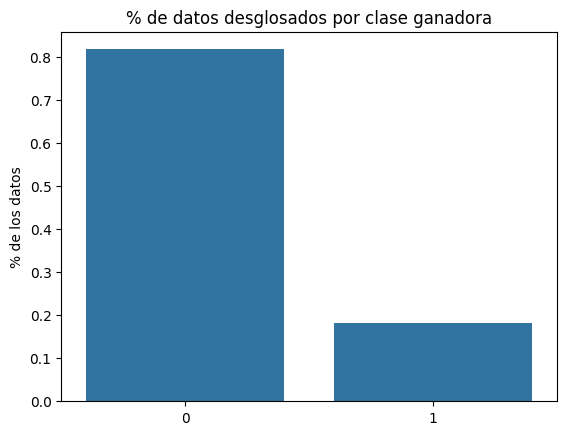

In [76]:
ci = sns.barplot(x=[0, 1], y=[(len(df2) - sum(df2['Winner'])) / len(df2), sum(df2['Winner']) / len(df2)])
ci.set(ylabel = "% de los datos", title="% de datos desglosados ​por clase ganadora")

Una cosa importante voy a tener en cuenta al implementar mi algoritmo final de aprendizaje automático es el desequilibrio entre la clase Ganador (1) y no ganador (0). Debido a que existe este desequilibrio, puede resultar difícil obtener una métrica de ajuste de buena calidad mediante el uso de algoritmos clásicos de aprendizaje automático.

Además, para comprender verdaderamente la calidad del modelo, observar el Área Característica Operativa del Receptor Bajo la Curva o en inglés (*Receiver Operating Characteristic Area Under the Curve (ROC AUC)*) podría ser una mejor medida de la calidad del modelo que observar una matriz de confusión o una medición de precisión general.

### d. Visualización de Datos

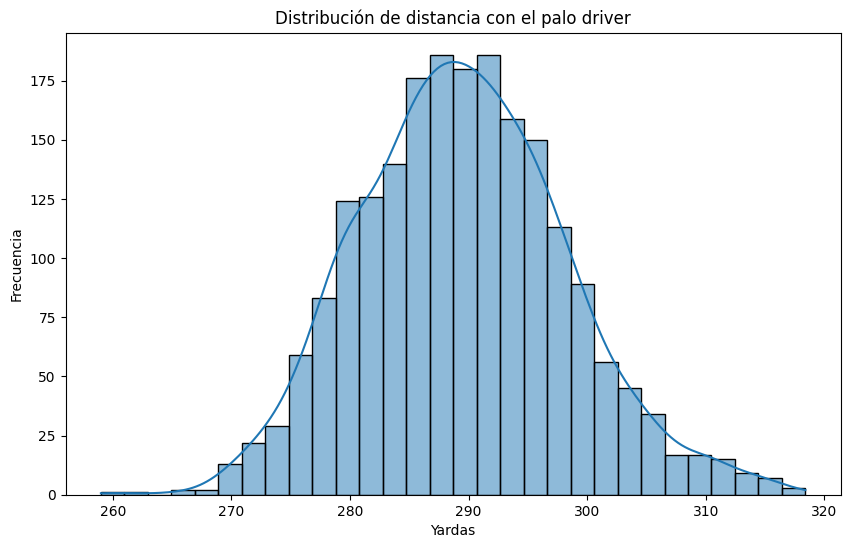

In [77]:
# Histograma de la variable 'DRIVE_DISTANCE'
plt.figure(figsize=(10, 6))
sns.histplot(df['DRIVE_DISTANCE'], bins=30, kde=True)
plt.title('Distribución de distancia con el palo driver')
plt.xlabel('Yardas')
plt.ylabel('Frecuencia')
plt.show()

**Observaciones**: Aquí vemos que la mayoría de los jugadores se concentra entre las 285 y 295 yardas.

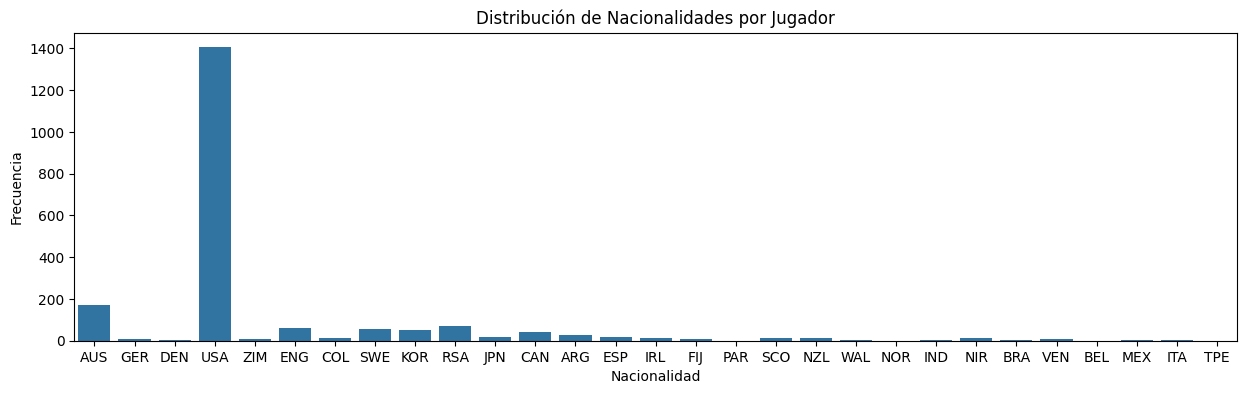

In [78]:
# Gráfico de barras para la variable 'COUNTRY'
plt.figure(figsize=(15, 4))
sns.countplot(x='COUNTRY', data=df)
plt.title('Distribución de Nacionalidades por Jugador')
plt.xlabel('Nacionalidad')
plt.ylabel('Frecuencia')
plt.show()

**Observaciones**: Como vemos la mayor cantidad de nacionalidades de golfistas se concentra en Estados Unidos, esto se debe a la cantidad de torneos y premios que ofrece jugar en ese país.

<Axes: xlabel='Year', ylabel='SCORING'>

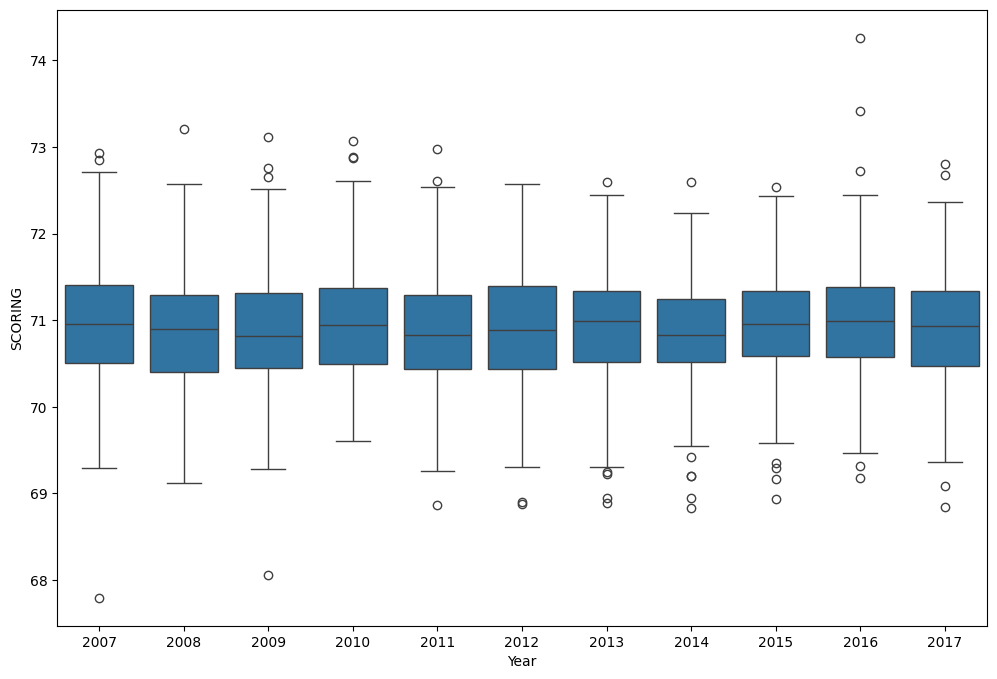

In [79]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='SCORING', data=df)

**Observaciones**: Vemos que la variable scoring se matiene relativamente estable.

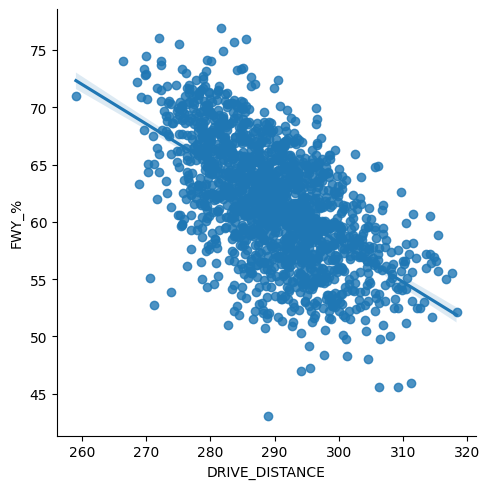

In [80]:
sns.lmplot(x='DRIVE_DISTANCE', y='FWY_%', data=df2)

**Observaciones**: La DISTANCIA PROMEDIO DEL DRIVE está correlacionada negativamente con el % FWY. Como fanático del golf, esto tiene sentido porque los jugadores que golpean más lejos tienen más probabilidades de hacerlo fuera del fairway que aquellos que no lo hacen tan lejos.

<Axes: xlabel='Year', ylabel='DRIVE_DISTANCE'>

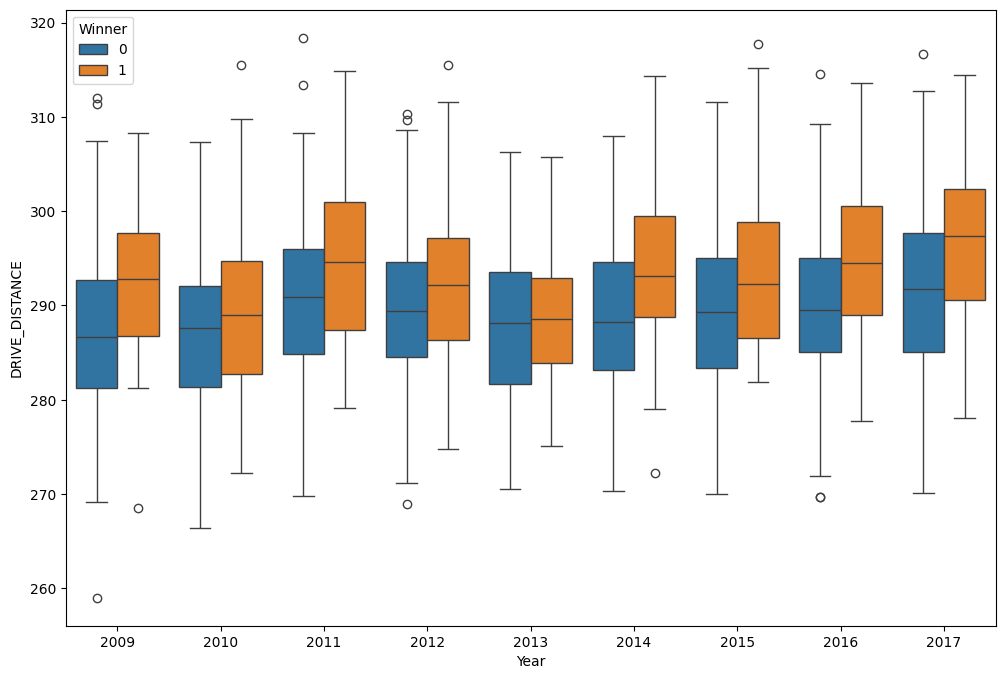

In [81]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='DRIVE_DISTANCE', hue='Winner', data=df2)

**Observaciones**: los ganadores de torneos tienden a enviar la pelota más lejos que los que no ganan torneos.

<Axes: xlabel='Year', ylabel='SCORING'>

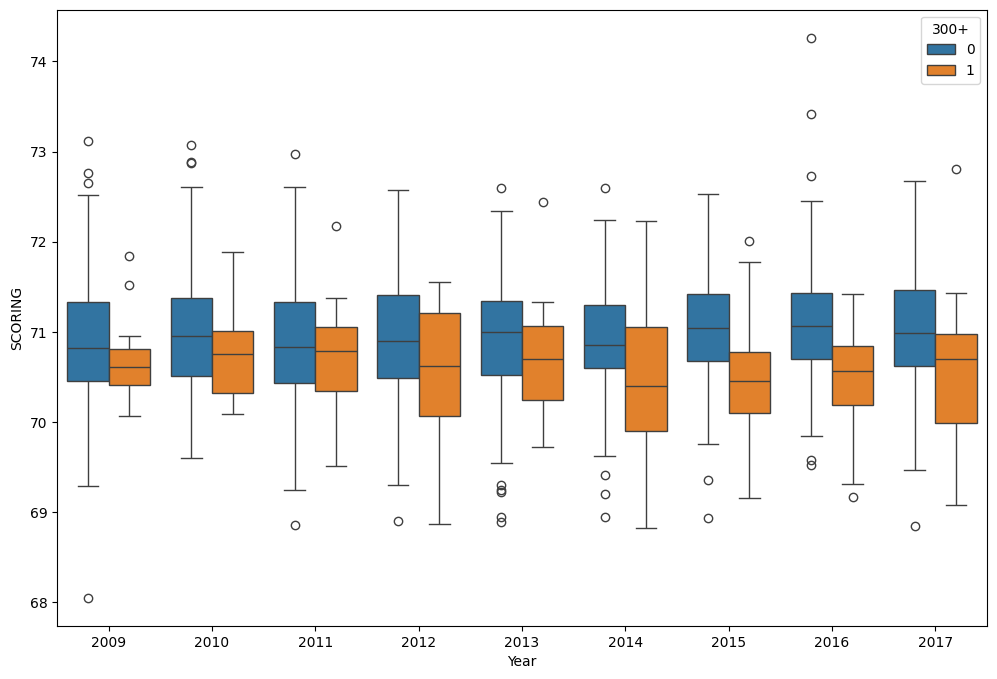

In [82]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Year', y = 'SCORING', hue='300+', data = df2)

**Observaciones**: Los golpean el DRIVE más largos tienden a tener un promedio de puntuación más bajo. Me sorprende que este parezca ser el caso prácticamente todos los años desde 2010.

<Axes: xlabel='Year', ylabel='300+'>

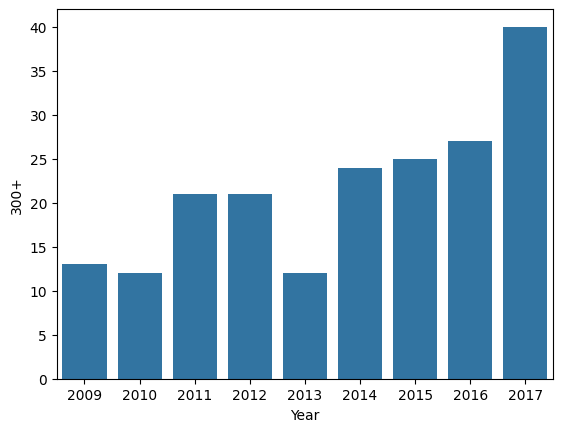

In [83]:
sns.barplot(x = 'Year', y = '300+', data = df2.groupby('Year').sum().reset_index())

**Observaciones**: Desde 2010, ha aumentado el número de jugadores que envían la pelota a más de 300 yardas en promedio. Lo sorprendente acá es que la cantidad de jugadores que promediaron más de 300 en 2016 en comparación con 2017 difiere en un factor de casi 1,5.

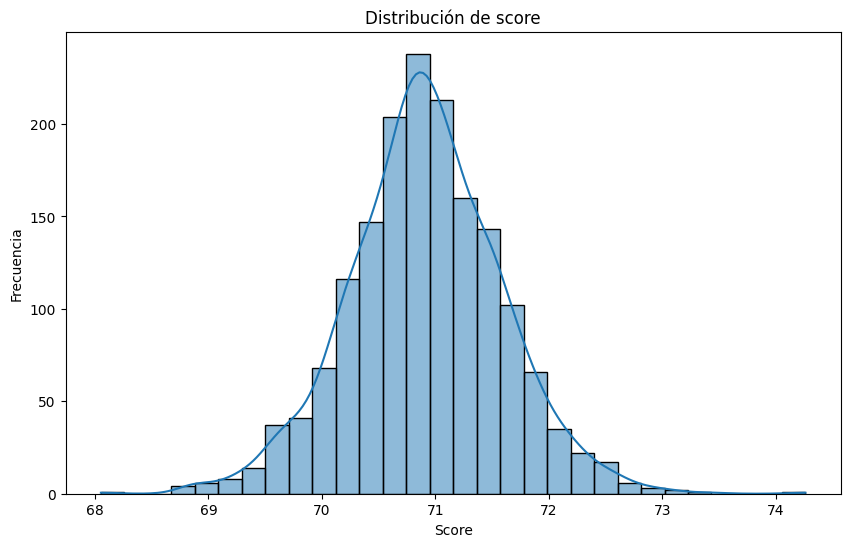

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['SCORING'], bins=30, kde=True)
plt.title('Distribución de score')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.show()

**Observaciones**: Los SCORES parecen tener una distribución aproximadamente normal, con algunos valores atípicos en el extremo superior de la distribución. El promedio de puntuación de todos los golfistas en todos los años es 70,9 con una desviación estándar de 0,688.

[(68.0, 73.0),
 Text(0.5, 1.0, "# de top 10's vs promedio de score"),
 Text(0, 0.5, 'Promedio de score')]

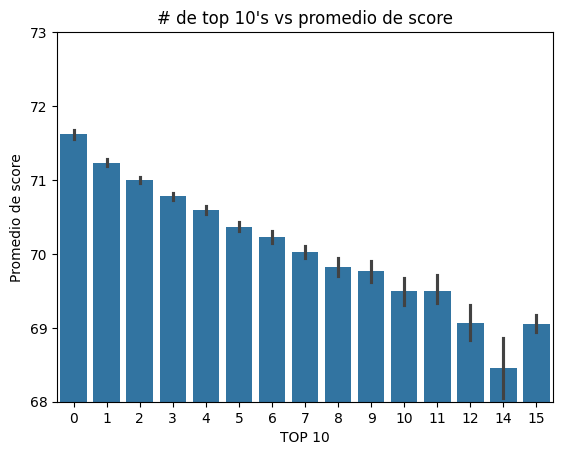

In [85]:
bp = sns.barplot(x="TOP 10",y='SCORING', data = df2)
bp.set(ylim=(68, 73), title="# de top 10's vs promedio de score", ylabel="Promedio de score")


**Observaciones**: A medida que aumenta el número de los 10 primeros, el promedio de score tiende a disminuir.

## 6. Selecionar Feature

### Ingeniería de features
Primero eliminaré las columnas nombre, primera y ganadora de df2 porque la columna nombre no será necesaria en el modelo de aprendizaje automático y la columna Ganador es la variable de destino. La columna Ganador se creó a partir de la primera columna, por lo que también la eliminaremos. A continuación, crearé algunas funciones de dominio basadas en mi conocimiento del juego. Por último, crearé términos de interacción entre todas las funciones no asociadas con un país.

In [86]:
# Matriz de correlación
names = df2['NAME']
target = df2['Winner']
#DSaco columnas
df2.drop(['NAME', '1ST', 'Winner'], axis=1, inplace=True)

#Obtener variables ficticias para la variable de país.
df2 = pd.get_dummies(df2)

<ipython-input-86-fdfb40774f59>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['NAME', '1ST', 'Winner'], axis=1, inplace=True)


Creamos las características del dominio

In [87]:
domain_feats = df2.copy()

In [88]:
#Creamos feature de dinero por ronda
domain_feats['MONEY_PER_ROUND'] = domain_feats['MONEY'] / domain_feats['ROUNDS']

In [89]:
#Creamos la metrica SG_P + SG_TTG
domain_feats['SG_SUM'] = domain_feats['SG_P'] + domain_feats['SG_TTG']

Creamos features polinómicos.

In [90]:
poly_features = df2.copy()

#Import polynomial feature module
from sklearn.preprocessing import PolynomialFeatures

#Create polynomial object with degree of 2
poly_transformer = PolynomialFeatures(degree = 2)

#Train the polynomial features on first 13 columns
poly_transformer.fit(poly_features.iloc[:, :13])

#Transform the features on first 13 columns
poly_features = poly_transformer.transform(poly_features.iloc[:,:13])

print('Polynomial Features Shape: ', poly_features.shape)

Polynomial Features Shape:  (1655, 105)


In [91]:
input_features = df2.columns[:13]

poly_features = pd.DataFrame(
    poly_features,
    columns=poly_transformer.get_feature_names_out(input_features)
)

In [92]:
poly_features = poly_features.iloc[:, 1:]
poly_features.head()

,ID,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,...,POINTS^2,POINTS TOP 10,POINTS Year,POINTS MONEY,TOP 10^2,TOP 10 Year,TOP 10 MONEY,Year^2,Year MONEY,MONEY^2
0,389.0,66.0,71.153,287.8,56.48,59.57,0.604,-0.755,-0.151,431.0,...,185761.0,862.0,865879.0,3.607750e+08,4.0,4018.0,1674130.0,4036081.0,1.681664e+09,7.006778e+11
1,390.0,53.0,71.720,294.9,58.77,62.82,-0.881,0.220,-0.660,432.0,...,186624.0,432.0,867888.0,3.383156e+08,1.0,2009.0,783138.0,4036081.0,1.573324e+09,6.133051e+11
2,391.0,82.0,70.980,281.2,69.80,66.52,-0.322,0.555,0.233,416.0,...,173056.0,1248.0,835744.0,3.967242e+08,9.0,6027.0,2860992.0,4036081.0,1.915911e+09,9.094750e+11
3,392.0,58.0,71.462,298.5,51.62,64.91,-0.044,-0.247,-0.291,329.0,...,108241.0,658.0,660961.0,2.596813e+08,4.0,4018.0,1578610.0,4036081.0,1.585714e+09,6.230024e+11
4,393.0,76.0,70.507,299.0,53.65,62.69,0.245,0.235,0.479,1420.0,...,2016400.0,4260.0,2852780.0,2.800460e+09,9.0,6027.0,5916465.0,4036081.0,3.962059e+09,3.889395e+12


## 7.   Selección del Algoritmo adecuado

In [93]:
from sklearn.model_selection import train_test_split #Train test splits
from sklearn.linear_model import LogisticRegression #Logistic regression
from sklearn.metrics import classification_report #Classification report metrics
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier
from sklearn.metrics import roc_curve, roc_auc_score



Función para ejecutar un modelo de **Random Forest**

In [94]:
# Preparar los datos
def rfc(X, y):

    #Dividir datos en conjuntos de entrenamiento y prueba.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

    #Inicializar clasificador de random forest
    rfc = RandomForestClassifier(n_estimators=200)

    #Ajustar el modelo a los datos de entrenamiento
    rfc.fit(X_train, y_train)

    #Imprimir tabla de características importantes
    feature_importance = pd.DataFrame({"Features" : list(X.columns), "Importance": rfc.feature_importances_})
    feature_importance.sort_values(by="Importance", ascending=False, inplace=True)
    plt.figure(figsize = (16, 8))
    sns.barplot(x = feature_importance['Features'][:10], y=feature_importance['Importance'])

    #Generar predicciones
    rfc_pred = rfc.predict(X_test)

    #Crear e imprimir matriz de confusión
    cf_dat = confusion_matrix(y_test, rfc_pred)
    confusion = pd.DataFrame(data = cf_dat)
    print(confusion)

    #Imprimir informe de clasificación
    print(classification_report(y_test, rfc_pred))

    #Imprimir ROC AUC Score
    print(roc_auc_score(y_test, rfc_pred))

    return roc_auc_score(y_test, rfc_pred)

Ejecute el modelo para características de **Baseline**, dominio y polinomios.

     0   1
0  432  18
1   31  66
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       450
           1       0.79      0.68      0.73        97

    accuracy                           0.91       547
   macro avg       0.86      0.82      0.84       547
weighted avg       0.91      0.91      0.91       547

0.8202061855670103


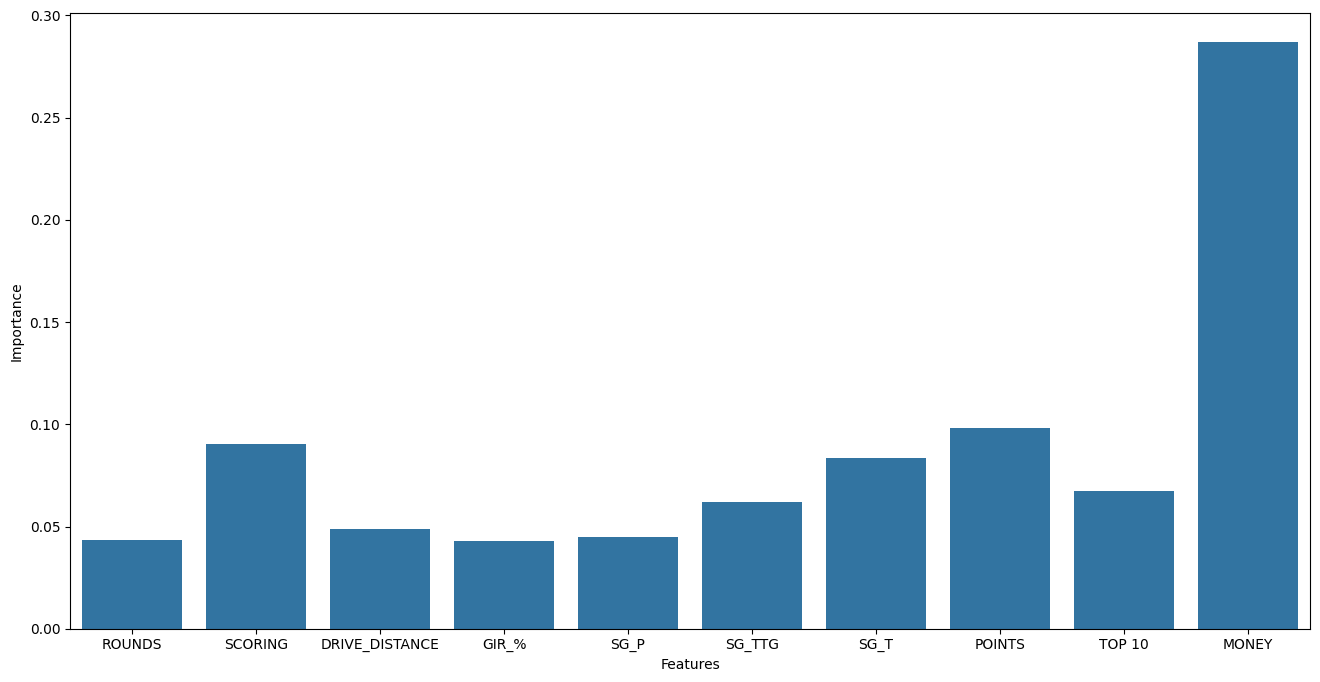

In [95]:
base_model = rfc(df2, target)

Feature del dominio.

     0   1
0  427  23
1   28  69
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       450
           1       0.75      0.71      0.73        97

    accuracy                           0.91       547
   macro avg       0.84      0.83      0.84       547
weighted avg       0.91      0.91      0.91       547

0.830114547537228


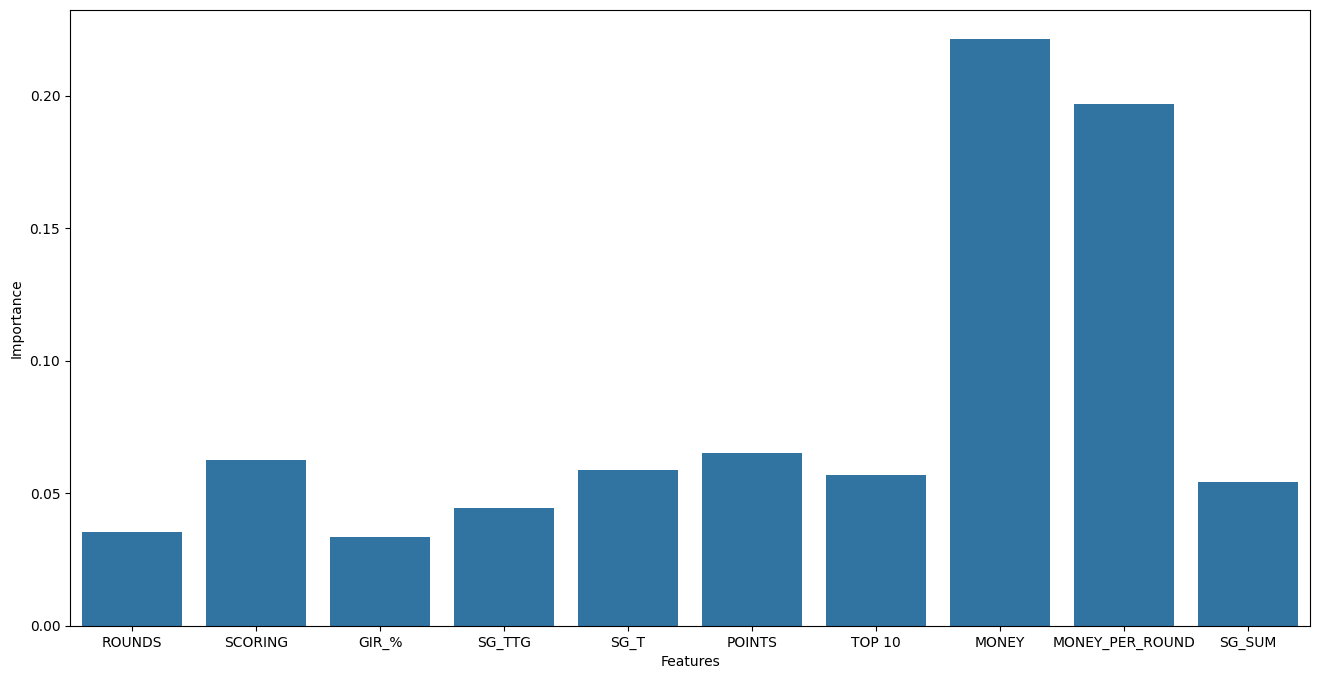

In [96]:
domain_model = rfc(domain_feats, target)

Feature Polinomial.

     0   1
0  424  26
1   22  75
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       450
           1       0.74      0.77      0.76        97

    accuracy                           0.91       547
   macro avg       0.85      0.86      0.85       547
weighted avg       0.91      0.91      0.91       547

0.857709049255441


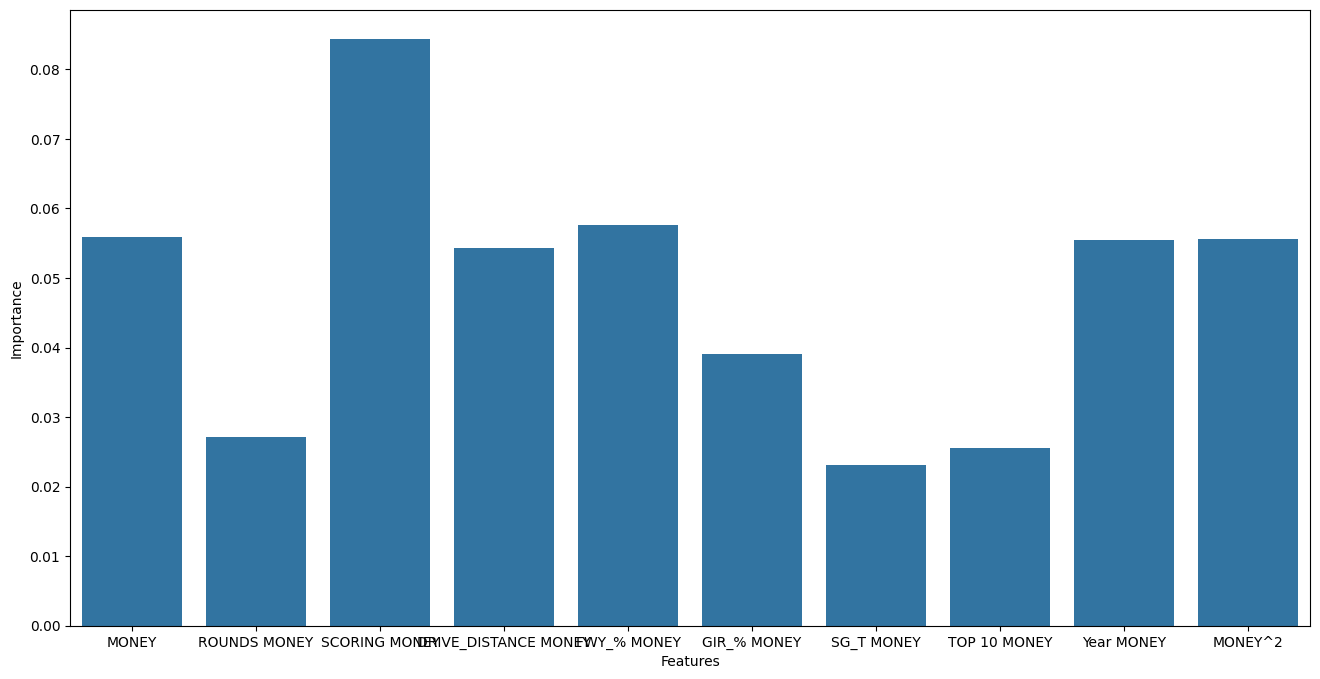

In [97]:
poly_model = rfc(poly_features, target)

## 8. Evaluar el modelo

In [98]:
# Evaluar el modelo
results = pd.DataFrame([base_model, domain_model, poly_model], index=['Baseline Model', 'Domain Feature Model', 'Polynomial Feature Model'], columns = ['ROC AUC Score'])

In [99]:
results

,ROC AUC Score
Baseline Model,0.820206
Domain Feature Model,0.830115
Polynomial Feature Model,0.857709



Podemos ver que la puntuación ROC AUC ha aumentado según el dominio de ingeniería y las features polinómicas.

## 9. Interpretación

Este resultado muestra algunas tendencias interesantes para los ganadores del PGA Tour que pretendo explorar más a fondo.

Los ganadores del PGA Tour tienden a golpear la pelota más lejos que los no ganadores. ¿Golpear la pelota más lejos proporciona más valor para los jugadores del PGA Tour que golpearla más recto?
La cantidad de jugadores que pegaron la pelotita a más de 300 yardas aumentó de 25 en 2016 a 41 en 2017. ¿Qué está causando este enorme aumento en los drives largos? ¿Podemos esperar que esto aumente al mismo ritmo? ¿Cómo afectará esto a futuros eventos de la gira?
La distancia ganada en el putt y el drive parecen aumentar las posibilidades de ganar. ¿Es más importante enviar la pelota más lejos o hacer un mejor putt en el green? Como se suele decir: "Jueaga el drive para canchererar, juega el putt para ganar dinero".

## 10. Conclusiones

### Resultados del modelo de aprendizaje automático
Podemos concluir que es un buen modelo para predecir si un jugador a podido ganar en algun evento del tour.
Según las métricas de ROC AUC anteriores, podemos ver que el ROC AUC,
que es la probabilidad de que el clasificador random forest clasifique una instancia positiva elegida al azar
por encima de una negativa elegida al azar (wikipedia), comienza en 0,8 para el modelo de referencia.
Con la ayuda de la ingeniería de funciones, vimos un aumento en ROC AUC a 0,85 al agregar funciones a nuestro modelo según el conocimiento del conjunto de datos y el deporte.
Además, vimos un aumento en el AUC de la ROC AUC a 0,86 al realizar
ingeniería de funciones automatizada al agregar términos de interacción y ordenar funciones polinómicas de 2 a todas las funciones
no asociadas con un país.
